In [1]:
import numpy as np
from single_sphere_analytics import DipoleParameters
import matplotlib.pyplot as plt

hbar_eVs = 6.58212E-16 # Planck's constant [eV*s]
c = 2.998E+10 # speed of light [cm/s]
import sys
sys.path.insert(1, '/Users/clairewest/werk/research/my_codes/coupled_dipoles')
from coupled_dipole_model import DipoleParameters
from coupled_dipole_model import CalculateCrossSections

### Genetic Algorithm Equations

In [22]:
def calc_analytics(w_ev):
    """This function plots the individual particle and total cross-sections.
    
    drive -- polarization of light (e.g. x polarized = np.array([1, 0, 0]) )
    """

    return P 

num = 2
def make_sphereheterodimer_input(radius1, radius2, gap, N=num):
    def_centers = np.zeros((N, 3))
    def_all_radii = np.zeros((N))
    def_centers[0,:] = np.array([ 0, 0, -radius1-gap/2 ])*1.E-7
    def_centers[1,:] = np.array([ 0, 0, radius2+gap/2 ])*1.E-7
    def_all_radii[0] = radius1*1.E-7
    def_all_radii[1] = radius2*1.E-7
    return def_centers, def_all_radii

def cal_pop_fitness(pop):
    # Calculating the fitness value of each solution in the current population.
    # Wavelength where abs_1 - abs_2 is max and vice versa
    w_pop = pop[:,0]
    gap_pop = pop[:,1]
    def_centers, def_all_radii = make_sphereheterodimer_input(radius1=30, 
                                                        radius2=50,
                                                        gap=gap_pop)
    
    calc_dips = CalculateCrossSections(centers=def_centers, 
                                   all_radii=def_all_radii, 
                                   num=num, 
                                   n=1., 
                                   wp=8.959/hbar_eVs, 
                                   eps_inf=9.695, 
                                   gam_drude=0.073/hbar_eVs)   

    drive = np.array([0, 0, 1])
    P = np.zeros((num, len(w_pop)))

    for i in range(0,len(w_pop)):
        _, P[:,i] = calc_dips.cross_sects(w=w_pop[i]/hbar_eVs, drive=drive)    
    fitness = P[1,:] - P[0,:]
    return fitness

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = np.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = np.where(fitness == np.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents

def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually it is at the center.
    crossover_point = np.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover):
    # Mutation changes a single gene in each offspring randomly.
    for idx in range(offspring_crossover.shape[0]):
        # The random value to be added to the gene.
        random_value = np.random.uniform(-0.01, 0.01, 1)
        mut_idx = 0
        offspring_crossover[idx, mut_idx] = offspring_crossover[idx, mut_idx] + random_value
    return offspring_crossover


### Defining initial population

In [24]:
num_weights = 2 # only guessing lambda
sol_per_pop = 8 

# The population will have sol_per_pop chromosome where each chromosome has num_weights genes.
pop_size = (sol_per_pop, num_weights) 

# Creating the initial population.
new_population = np.random.uniform(low=1., high=4., size=pop_size)
print(new_population.shape)

cal_pop_fitness(new_population)

(8, 2)


<ipython-input-22-92506629d32d>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  def_centers[0,:] = np.array([ 0, 0, -radius1-gap/2 ])*1.E-7


ValueError: setting an array element with a sequence.

In [18]:
num_generations = 100
num_parents_mating = 4

for generation in range(num_generations):
    # Measuring the fitness of each chromosome in the population.
    # i.e. calculates T(lambda). The greater the T, the better the answer.
    fitness = cal_pop_fitness(new_population)
    
    # Selecting the best parents in the population for mating.
    parents = select_mating_pool(new_population, fitness, 
                                       num_parents_mating)
    
    # Generating next generation using crossover.
    offspring_crossover = crossover(parents,
                                        offspring_size=(pop_size[0]-parents.shape[0], num_weights))

    # Adding some variations to the offsrping using mutation. (It's currently hitting the 4th gene)
    offspring_mutation = mutation(offspring_crossover)
    
    # Creating the new population based on the parents and offspring.
    # We keep the parents just in case all the randomly generated offspring are worse. This prevents us from going backwards.
    # 4 parents, 4 offspring
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
    
    # The best result in the current iteration.
#     print("Best result : ", np.max(cal_pop_fitness(new_population)))

# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.
fitness = cal_pop_fitness(new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.where(fitness == np.max(fitness))

# print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])

print(new_population[best_match_idx])

ValueError: too many values to unpack (expected 2)

[2.4]


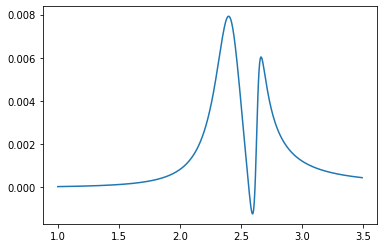

In [13]:
def_centers, def_all_radii = make_sphereheterodimer_input(radius1=30, 
                                                    radius2=50,
                                                    gap=10)
calc_dips = CalculateCrossSections(centers=def_centers, 
                               all_radii=def_all_radii, 
                               num=num, 
                               n=1., 
                               wp=8.959/hbar_eVs, 
                               eps_inf=9.695, 
                               gam_drude=0.073/hbar_eVs) 




w = np.arange(1,3.5,.005)/hbar_eVs
drive = np.array([0, 0, 1])
P = np.zeros((num, len(w)))

for i in range(0,len(w)):
    _, P[:,i] = calc_dips.cross_sects(w=w[i], drive=drive)  

# plt.plot(w*hbar_eVs, P[0,:])
# plt.plot(w*hbar_eVs, P[1,:])
plt.plot(w*hbar_eVs, P[1,:]-P[0,:])
print(w[np.where(P[1,:]-P[0,:] == max(P[1,:]-P[0,:]))]*hbar_eVs)